In [1]:
#Import bibs
import pandas as pd
import numpy as np
import progressbar
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib notebook')
%matplotlib notebook
import itertools
import os
import sys
from IPython.display import display, HTML

In [2]:
#Import funtions
sys.path.insert(0, '../Implementation_Events_Kopie/')
from Event_detection_functions import combine_charging_events
sys.path.insert(0, '../')
from IMPORT_DATAFRAME_JSON_HDF5 import *
sys.path.insert(0, '../Plotting_Skript/')
from plot_transients_function import *

In [3]:

def cars_charging(timestamp,ladevorgang_df):
    
    #Filter out all events that are in the timeframe of the input timestamp
    current_cars = ladevorgang_df[((timestamp >= ladevorgang_df['timestamp_start']) & ((timestamp <  ladevorgang_df['Ladevorgang_ende']) | (timestamp <  ladevorgang_df['timestamp_start']+3600)))]
    
    #Helper columns for the calculation
    current_cars['length_phase'] = current_cars['Phasen'].apply(lambda x: len(x))
    current_cars['Phase_1'] = current_cars['Phasen'].apply(lambda x: 1 in x)
    current_cars['Phase_2'] = current_cars['Phasen'].apply(lambda x: 2 in x)
    current_cars['Phase_3'] = current_cars['Phasen'].apply(lambda x: 3 in x)

    one_phase = int(current_cars[current_cars['length_phase']==1].count()['Phasen'])
    two_phases = int(current_cars[current_cars['length_phase']==2].count()['Phasen'])
    three_phases = int(current_cars[current_cars['length_phase']==3].count()['Phasen'])

    cars_phase_1 = int(current_cars[current_cars['Phase_1'] == True].count()['Phase_1'])
    cars_phase_2 = int(current_cars[current_cars['Phase_2'] == True].count()['Phase_2'])
    cars_phase_3 = int(current_cars[current_cars['Phase_3'] == True].count()['Phase_3'])
    
    cars_total = one_phase+two_phases+three_phases

    one_phase, two_phases, three_phases, cars_total, cars_phase_1, cars_phase_2, cars_phase_3

    charging_df = pd.DataFrame(columns = ['timestamp','cars_total','one_phase' ,'two_phases', 'three_phases', 'cars_phase_1','cars_phase_2','cars_phase_3'])
    charging_df.loc[0] = [timestamp,cars_total,one_phase, two_phases, three_phases,cars_phase_1, cars_phase_2, cars_phase_3 ]

    return charging_df

In [4]:
day = '09'
month = '08'
year = '2017'
date_HDF5 = year+'-'+month+'-'+day
HDF5_filepath = '../../../HDF5/'+date_HDF5+'/'
transients_filepath = '../../../transients_new/'+month
transients_start_string = 'transient_'+day+'-'+month

In [5]:
# Import daily transients
transient_list = []
for filename in os.listdir(transients_filepath):
    if filename[10:15]==(day+'-'+month):
        transient_list.append(filename)

daily_transients_df = import_trasient_from_file_daily(transients_filepath,transient_list)

In [6]:
# Import Event df
daily_event_df = pd.read_pickle(HDF5_filepath+'2017-'+month+'-'+day+'_event_df.pkl')
ladevorgang_df = combine_charging_events(daily_event_df)

../Implementation_Events_Kopie\Event_detection_functions.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  same_events['deviation_average'] = same_events['Ladeleistung'].                                     apply(lambda ladeleistung_auto: ladeleistung_auto/(same_events['Ladeleistung'].mean()))


In [7]:
###Adding information on how many cars are charging to the transients
#declaring new df
charging_df_transients = cars_charging(0,ladevorgang_df)
charging_df_transients = charging_df_transients.drop(charging_df_transients.index[0])

for index, row in daily_transients_df.iterrows():
    timestamp = index
    charging_df = cars_charging(timestamp,ladevorgang_df)
    charging_df_transients = charging_df_transients.append(charging_df)

#preparation for merge
transients_jsons = daily_transients_df.reset_index(drop=False)
charging_df_transients = charging_df_transients.rename(columns={'timestamp':'begin_timestamp_float'})
charging_df_transients = charging_df_transients.reset_index(drop=True)
#merging the two dfs
combined_df = pd.merge(transients_jsons,charging_df_transients,left_index=True, right_index=True)
combined_df 

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

,begin_timestamp_float_x,begin_index,begin_timestamp_string,filtered_signal,phase_num,raw_signal_current,raw_signal_voltage,three_first_peaks,three_first_peaks_index,transient_rise_gradient,begin_timestamp_float_y,cars_total,one_phase,two_phases,three_phases,cars_phase_1,cars_phase_2,cars_phase_3
0,1.502230e+09,731,09-08-2017_00:09:02_831845,"[-0.10765988380000001, -0.0960686058, -0.15950...",2,"[0.5798339844, 0.6103515625, 0.5798339844, 0.5...","[301.7278137207, 301.8316040039, 301.987335205...","[23.913, 4.103, 2.737]","[783, 901, 1026]",2.286939e+05,1.502230e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.502230e+09,7669,09-08-2017_00:13:30_235087,"[0.09711609780000001, 0.0571870804, 0.07018982...",3,"[-0.9155273438, -0.8697509766, -0.9002685547, ...","[301.8031005859, 301.7628479004, 301.615234375...","[30.527, 29.473, 4.520]","[7679, 7733, 7991]",1.411324e+06,1.502230e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.502247e+09,6629,09-08-2017_04:42:23_537369,"[-0.1853736986, -0.08157869250000001, -0.21137...",2,"[0.5187988281, 0.5950927734, 0.5645751953, 0.6...","[296.8618469238, 296.9267272949, 297.095428466...","[60.361, 25.118, 23.698]","[6641, 6654, 7188]",-2.438438e+06,1.502247e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.502247e+09,6633,09-08-2017_04:42:23_537377,"[-0.11786051850000001, -0.0507878228, -0.11790...",3,"[0.8239746094, 0.8392333984, 0.7629394531, 0.7...","[-297.6829833984, -297.6024475098, -297.427978...","[23.360, 19.260, 8.741]","[6642, 6654, 6666]",-1.077827e+06,1.502247e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.502251e+09,4285,09-08-2017_05:58:10_305310,"[-0.1821735203, -0.0649057776, -0.117244564000...",1,"[-1.8768310547, -1.8920898438, -1.8463134766, ...","[0.1430258453, -0.1690305471, -0.2730493546, -...","[23.297, 8.874, 19.741]","[4293, 4312, 4941]",1.446000e+06,1.502251e+09,1.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1.502251e+09,4286,09-08-2017_05:58:10_305313,"[-0.061904970600000005, -0.048353396400000005,...",2,"[20.6756591797, 20.7061767578, 20.6909179688, ...","[291.814239502, 291.9440002441, 291.9959106445...","[24.615, 5.542, 1.547]","[4294, 5024, 8600]",1.570002e+06,1.502251e+09,1.0,1.0,0.0,0.0,0.0,1.0,0.0
6,1.502251e+09,4285,09-08-2017_05:58:10_305310,"[0.5071801543, 0.5883006454, 0.7219724059, 0.6...",3,"[0.8239746094, 0.8392333984, 0.8697509766, 0.9...","[-293.8044128418, -293.7373046875, -293.683624...","[77.851, 26.098, 1.884]","[4295, 4973, 9695]",3.818725e+06,1.502251e+09,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7,1.502255e+09,8354,09-08-2017_06:57:08_354588,"[-0.048431036000000004, -0.035060763, 0.125883...",3,"[-15.2587890625, -15.1672363281, -15.151977539...","[-294.5425415039, -294.3949279785, -294.394927...","[54.004, 19.884, 43.918]","[8365, 8385, 8974]",-2.396833e+06,1.502255e+09,2.0,2.0,0.0,0.0,0.0,1.0,1.0
8,1.502257e+09,757,09-08-2017_07:32:25_957446,"[0.0520091262, 0.2470443944, 0.208037315200000...",1,"[-1.9378662109, -1.9378662109, -1.9683837891, ...","[-0.0780140981, -0.4030728638, -0.481086939600...","[25.641, 14.745, 19.530]","[765, 783, 1321]",1.577347e+06,1.502257e+09,3.0,3.0,0.0,0.0,0.0,1.0,2.0
9,1.502257e+09,757,09-08-2017_07:32:25_957446,"[0.103787445, 0.22057819920000002, 0.259518608...",2,"[20.4467773438, 20.4162597656, 20.4772949219, ...","[291.0357055664, 291.0486755371, 291.126525878...","[82.384, 15.999, 60.325]","[764, 783, 1320]",5.691770e+06,1.502257e+09,3.0,3.0,0.0,0.0,0.0,1.0,2.0


In [8]:
def cars_on_this_phase(df):
    phase = df['phase_num']
    cars = df['cars_phase_'+str(phase)]
    return cars

In [9]:
combined_df['cars_on_this_phase'] = combined_df.apply(cars_on_this_phase,axis=1)


In [10]:
# Import HDF5's
Phase_1,P_Phase_1,no_load_p_1=[],[],[]
Phase_2,P_Phase_2,no_load_p_2=[],[],[]
Phase_3,P_Phase_3,no_load_p_3=[],[],[]
Phase_dictionary = {1:Phase_1, 2:Phase_2,3:Phase_3}
for Phase in [1,2,3]:
    Phase_dictionary[Phase] =pd.read_hdf(HDF5_filepath+'/phase_'+str(Phase)+'_' + date_HDF5+'.h5',columns =['P', 'timestamps'])


In [11]:
# Add information on Power to transients
x= combined_df
x['P']=0
for z in range(0,len(x)):
    x['P'][z] =Phase_dictionary[x['phase_num'][z]][(Phase_dictionary[x['phase_num'][z]]['timestamp']>=x['begin_timestamp_float_x'][z]) & 
       (Phase_dictionary[x['phase_num'][z]]['timestamp']<=x['begin_timestamp_float_x'][z]+0.2)]['P']
combined_df =x

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<IPython.core.display.Javascript object>


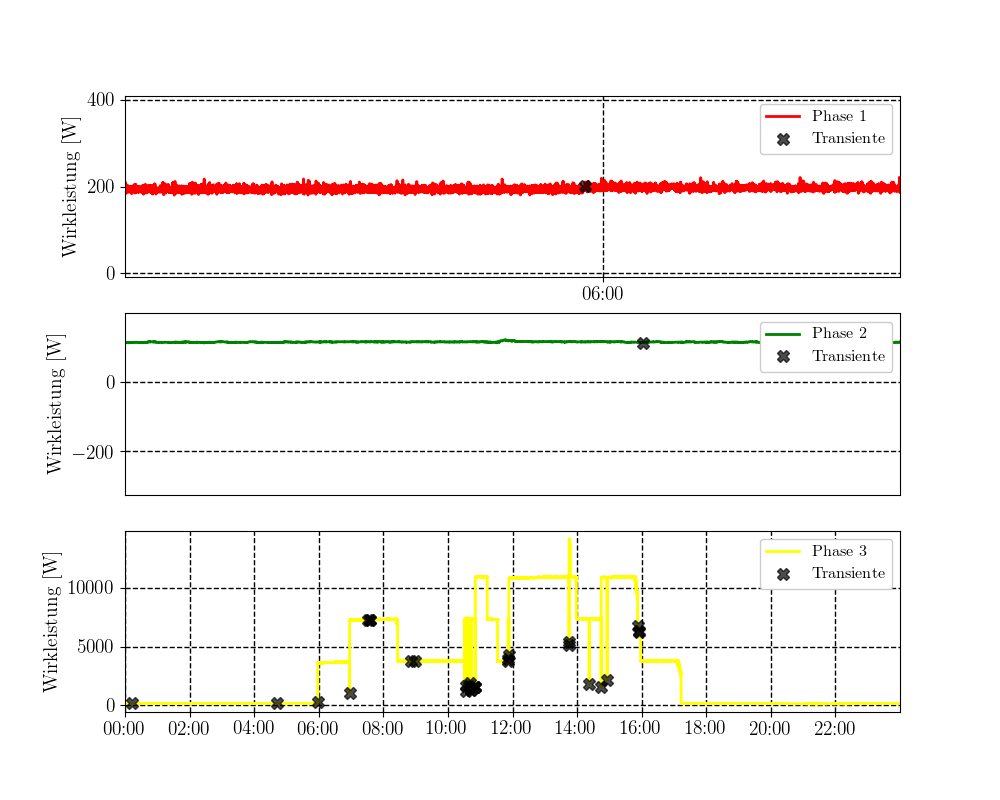

In [19]:
#Plot transienten und HDF5 in voller Auflösung
colors_phase = ['red','green','yellow']
plt.figure(figsize=(10,8))
for Phase in [1,2,3]:
    Phase_P = Phase_dictionary[Phase]
    plt.subplot(310+Phase)
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.plot(Phase_P['timestamp'],Phase_P['P'], color=colors_phase[Phase-1], linewidth=2, label='Phase '+str(Phase))
    
    plt.legend(loc='upper right', frameon=True, fontsize = 'small',framealpha=1)

    
    
    plt.plot(combined_df[combined_df.phase_num == Phase]['begin_timestamp_float_x'],combined_df[combined_df.phase_num == Phase]['P'],"X", color="black", markersize=8,alpha=.7, label='Transiente')
    plt.legend(loc='upper right', frameon=True, fontsize = 'small',framealpha=1)
    plt.rcParams.update({'font.size': 14})
    plt.grid(color='k', linestyle='--', linewidth=1)
    plt.xlim([(int(round(Phase_P.iloc[0]['timestamp']))),(int(round(Phase_P.iloc[len(Phase_P)-1]['timestamp'])))])
    plt.xticks(range(int(round(Phase_P.iloc[0]['timestamp'])),int(round(Phase_P.iloc[len(Phase_P)-1]['timestamp'])),7200),('00:00','02:00','04:00','06:00','08:00','10:00','12:00','14:00','16:00','18:00','20:00','22:00','24:00'))


    plt.ylabel('Wirkleistung [W]')
    #plt.savefig('G:/Dropbox/Dropbox/Uni/Master/Master 6/PUEL/06_Ausarbeitung/PUEL_Ausarbeitung/Kapitel4/'+day+'_'+month+'__3_Phasen_P.pdf')
    #plt.savefig("G:\Dropbox\Dropbox\Uni\Master\Master 6\PUEL\06_Ausarbeitung\PUEL_Ausarbeitung\Kapitel3\")+str(day)+str(month)+'.pdf')
#from matplotlib2tikz import save as tikz_save
#tikz_save('test.tex')

In [ ]:
#Einschaltvorgänge rausfinden
combined_df['plugin_on_this_phase']=False
combined_df['plugin_on_other_phase']=False
for row in range(0,len(combined_df)):

    phase =  combined_df.loc[row]['phase_num']
    hdf5 = Phase_dictionary[phase]
    timestamp_transient =  combined_df.loc[row]['begin_timestamp_float_x']


    p_before = hdf5[(hdf5['timestamp'] < timestamp_transient-10) & (hdf5['timestamp'] > timestamp_transient-20)]['P'].mean()
    p_after = hdf5[(hdf5['timestamp'] < timestamp_transient+20) & (hdf5['timestamp'] > timestamp_transient+10)]['P'].mean()
    p_delta = p_after-p_before

    if (p_delta) > 2000:
        combined_df.set_value(row,'plugin_on_this_phase',True)
        combined_df.set_value(row,'plugin_on_other_phase',False)
    else:
        combined_df.set_value(row,'plugin_on_this_phase',False)


    

In [ ]:
#Einfluss von Einschaltvorgängen auf anderen Phasen rausfinden
combined_df_plugin_events = combined_df[combined_df['plugin_on_this_phase']==True]
combined_df_plugin_events_to_check = combined_df[combined_df['plugin_on_this_phase']==False]
for row in (combined_df_plugin_events.index):
    timestamp_string = combined_df_plugin_events.loc[row]['begin_timestamp_string'][:24]
    for row2 in (combined_df_plugin_events_to_check.index):
        if (timestamp_string)==(combined_df_plugin_events_to_check.loc[row2]['begin_timestamp_string'][:24]):
            combined_df.set_value(row2,'plugin_on_other_phase',True)
        elif (combined_df.loc[row2]['plugin_on_other_phase']!=True):
            combined_df.set_value(row2,'plugin_on_other_phase',False)

In [ ]:
# Check auf Leistungsdip und "Gezappel"
combined_df['Leistungsdip_on_this_phase']=False
combined_df['Leistungsdip_on_other_phase']=False
combined_df['Gezappel_on_this_phase']=False

combined_df_res = combined_df[(combined_df['plugin_on_other_phase']!=True) & (combined_df['plugin_on_this_phase']!=True)]
for row in combined_df_res.index:

    phase =  combined_df.loc[row]['phase_num']
    hdf5 = Phase_dictionary[phase]
    timestamp_transient =  combined_df.loc[row]['begin_timestamp_float_x']

    #Frame to evaluate for Leistungsdip
    frame_to_evaluate = hdf5[(hdf5['timestamp'] <= timestamp_transient+1) & (hdf5['timestamp'] >= timestamp_transient-1)]['P'].diff()
    #Frame to evaluate for Gezappel
    frame_to_evaluate_gezappel = hdf5[(hdf5['timestamp'] <= timestamp_transient+10) & (hdf5['timestamp'] >= timestamp_transient-10)]['P'].diff()
    #Frame outside of Leistungsdip
    frame_gezappel = frame_to_evaluate_gezappel[~frame_to_evaluate_gezappel.index.isin(frame_to_evaluate.index)]  
    
    gezappel_counter = frame_gezappel[abs(frame_gezappel)>500].count()
    
    frame_before_transient = hdf5[(hdf5['timestamp'] <= timestamp_transient) & (hdf5['timestamp'] >= timestamp_transient-1)]['P'].diff()
    frame_after_transient = hdf5[(hdf5['timestamp'] >= timestamp_transient) & (hdf5['timestamp'] <= timestamp_transient+1)]['P'].diff()

    negative_gradient = frame_to_evaluate[frame_to_evaluate <0].sum()
    positive_gradient = frame_to_evaluate[frame_to_evaluate >0].sum()
    
    gradient_before = frame_before_transient.sum()
    gradient_after = frame_after_transient.sum()
    
    #Leistungsdip check
    if ((negative_gradient<-1000)&(positive_gradient>1000)&((gradient_before<-500)|(gradient_after>500))):
        combined_df.set_value(row,'Leistungsdip_on_this_phase',True)
        combined_df.set_value(row,'Leistungsdip_on_other_phase',False)
        #Gezappel check
        if (gezappel_counter>10):
            combined_df.set_value(row,'Gezappel_on_this_phase',True)
        else:
            combined_df.set_value(row,'Gezappel_on_this_phase',False)
    else:
        combined_df.set_value(row,'Leistungsdip_on_this_phase',False)
        combined_df.set_value(row,'Leistungsdip_on_other_phase',False)

#Einfluss von Leistungsdip auf anderen Phasen rausfinden
combined_df_leistungsdip_events = combined_df[combined_df['Leistungsdip_on_this_phase']==True]
combined_df_leistungsdip_events_to_check = combined_df[combined_df['Leistungsdip_on_this_phase']==False]
for row in (combined_df_leistungsdip_events.index):
    timestamp_string = combined_df_leistungsdip_events.loc[row]['begin_timestamp_string'][:24]
    for row2 in (combined_df_leistungsdip_events_to_check.index):
        if (timestamp_string)==(combined_df_leistungsdip_events_to_check.loc[row2]['begin_timestamp_string'][:24]):
            combined_df.set_value(row2,'Leistungsdip_on_other_phase',True)
        elif (combined_df.loc[row2]['Leistungsdip_on_other_phase']!=True):
            combined_df.set_value(row2,'Leistungsdip_on_other_phase',False)

    

In [ ]:
# Check auf restliche Transienten, die bei Leistungsänderung auftreten
combined_df['Sonstige_Leistungsaenderung_this_phase']=False
combined_df['Sonstige_Leistungsaenderung_other_phase']=False

combined_df_res = combined_df[(combined_df['plugin_on_this_phase']!=True) & 
                                   (combined_df['plugin_on_other_phase']!=True) &
                                  (combined_df['Leistungsdip_on_this_phase']!=True) &
                                  (combined_df['Leistungsdip_on_other_phase']!=True)]


for row in combined_df_res.index:

    phase =  combined_df.loc[row]['phase_num']
    hdf5 = Phase_dictionary[phase]
    timestamp_transient =  combined_df.loc[row]['begin_timestamp_float_x']

    #Frame to evaluate for sonstige Leistungsänderung
    frame_to_evaluate = hdf5[(hdf5['timestamp'] <= timestamp_transient+1) & (hdf5['timestamp'] >= timestamp_transient-1)]['P'].diff()
    Summe_Leistungsaenderung = abs(frame_to_evaluate).sum()
    #Sonstige Leistungsänderung check
    if (Summe_Leistungsaenderung>70):
        combined_df.set_value(row,'Sonstige_Leistungsaenderung_this_phase',True)
        combined_df.set_value(row,'Sonstige_Leistungsaenderung_other_phase',False)
    else:
        combined_df.set_value(row,'Sonstige_Leistungsaenderung_this_phase',False)
        combined_df.set_value(row,'Sonstige_Leistungsaenderung_other_phase',False)

#Einfluss von Leistungsdip auf anderen Phasen rausfinden
combined_df_Leistungsaenderung_events = combined_df[combined_df['Sonstige_Leistungsaenderung_this_phase']==True]
combined_df_Leistungsaenderung_events_to_check = combined_df[combined_df['Sonstige_Leistungsaenderung_this_phase']==False]
for row in (combined_df_Leistungsaenderung_events.index):
    timestamp_string = combined_df_Leistungsaenderung_events.loc[row]['begin_timestamp_string'][:24]
    for row2 in (combined_df_Leistungsaenderung_events_to_check.index):
        if (timestamp_string)==(combined_df_Leistungsaenderung_events_to_check.loc[row2]['begin_timestamp_string'][:24]):
            combined_df.set_value(row2,'Sonstige_Leistungsaenderung_other_phase',True)
        elif (combined_df.loc[row2]['Sonstige_Leistungsaenderung_other_phase']!=True):
            combined_df.set_value(row2,'Sonstige_Leistungsaenderung_other_phase',False)

In [ ]:
# Check auf restliche Transienten ---> Event from outside
combined_df['event_from_outside'] = False

combined_df_res = combined_df[(combined_df['plugin_on_this_phase']!=True) & 
                                   (combined_df['plugin_on_other_phase']!=True) &
                                  (combined_df['Leistungsdip_on_this_phase']!=True) &
                                  (combined_df['Leistungsdip_on_other_phase']!=True) &
                                 (combined_df['Sonstige_Leistungsaenderung_this_phase']!=True) &
                                  (combined_df['cars_on_this_phase']==0)&
                                 (combined_df['Sonstige_Leistungsaenderung_other_phase']!=True)]

for rows in combined_df_res.index:
    combined_df.set_value(rows,'event_from_outside',True)
    